In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/
#data = pd.read_csv(" /content/drive/My Drive/Colab Notebooks/")

/content/drive/My Drive/Colab Notebooks


In [ ]:
data = pd.read_csv('./test.csv')

In [ ]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
data.dropna

<bound method DataFrame.dropna of        uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son 

In [ ]:
data.shape

(53766, 7)

In [ ]:
data.drop_duplicates(subset=['drugName'])

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53546,145452,Empagliflozin / metformin,min),"""Update to my other review. The Dr&#039;s off...",10,4-Oct-16,10
53628,92720,Allergy DN PE,Rhinitis,"""It took years to find the right combination o...",10,6-May-10,4
53637,6838,Guarana,Herbal Supplementation,"""used only 1 pill (100% guarana) early AM for ...",10,13-Sep-16,4
53724,27561,Maprotiline,Depression,"""I have been taking maprotiline for over 35 ye...",9,19-May-15,10


In [ ]:
data = data.drop(labels = ['review', 'usefulCount','date'],axis =1)

In [ ]:
data.head(3)

,uniqueID,drugName,condition,rating
0,163740,Mirtazapine,Depression,10
1,206473,Mesalamine,"Crohn's Disease, Maintenance",8
2,159672,Bactrim,Urinary Tract Infection,9


In [ ]:
data['drugName'] = data['drugName'].str.lower()

In [ ]:
data.head(3)

,uniqueID,drugName,condition,rating
0,163740,mirtazapine,Depression,10
1,206473,mesalamine,"Crohn's Disease, Maintenance",8
2,159672,bactrim,Urinary Tract Infection,9


**K - means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [120]:
data['condition'].dtype

dtype('S62')

In [119]:
data['condition'] = data['condition'].astype('|S')

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidfMatrix = tfidf.fit_transform(data['condition'].tolist())
tfidfMatrix

<53766x894 sparse matrix of type '<class 'numpy.float64'>'
	with 97954 stored elements in Compressed Sparse Row format>

In [ ]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit(tfidfMatrix)

In [ ]:
km.inertia_

40089.58337747656

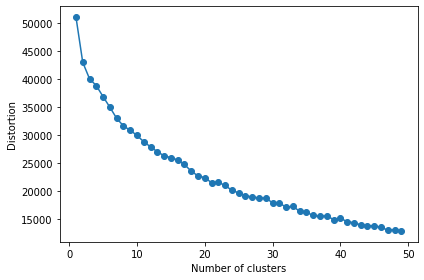

In [ ]:
distortions = []
for i in range(1, 50):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidfMatrix)
    distortions.append(km.inertia_)
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

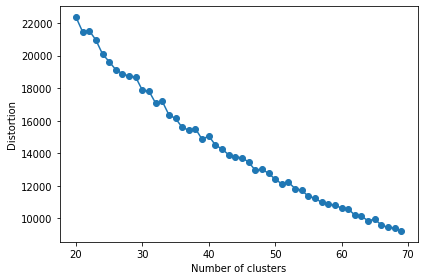

In [ ]:
distortions = []
for i in range(20, 70):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidfMatrix)
    distortions.append(km.inertia_)
plt.plot(range(20, 70), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

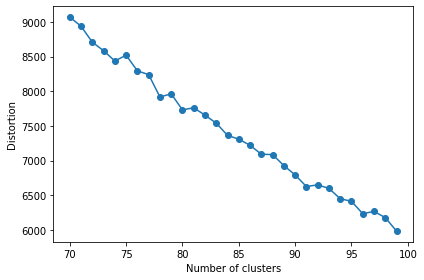

In [ ]:
distortions = []
for i in range(70, 100):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidfMatrix)
    distortions.append(km.inertia_)
plt.plot(range(70, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

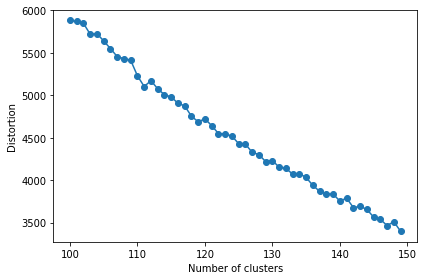

In [ ]:
distortions = []
for i in range(100, 150):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidfMatrix)
    distortions.append(km.inertia_)
plt.plot(range(100, 150), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

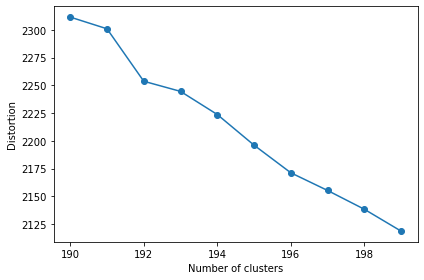

In [ ]:
distortions = []
for i in range(190, 200):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(tfidfMatrix)
    distortions.append(km.inertia_)
plt.plot(range(190, 200), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit(tfidfMatrix)

In [ ]:
medicine_name=input("Enter the name of the Medicine:- ")

Enter the name of the Medicine:- skyla


In [108]:
a = np.array(tfidfMatrix.toarray())

In [109]:
from sklearn.neighbors import KDTree

In [110]:
kdtree = KDTree(a ,leaf_size=5)

In [111]:
medicine_name=input("Enter the name of the Medicine:- ")

Enter the name of the Medicine:- skyla


In [ ]:
resultdf = pd.DataFrame(columns=['Medicine Name','Condition',
                                    'Rating'])
df1 = pd.DataFrame(columns=['Medicine Name'])
df2=pd.DataFrame(columns=['Condition'])                                    
df3 = pd.DataFrame(columns=['Rating'])


In [113]:
type(idx)

numpy.ndarray

In [114]:
idx

array([[ 6, 45, 37, ...,  4, 43,  9],
       [ 6, 45, 37, ...,  4, 43,  9],
       [ 6, 45, 37, ...,  4, 43,  9],
       ...,
       [ 6, 45, 37, ...,  4, 43,  9],
       [ 6, 45, 37, ...,  4, 43,  9],
       [ 6, 45, 37, ...,  4, 43,  9]])

In [103]:
di={}
l = ['drugName','condition','rating']
for i in l:
  di[i]=[]
  for j, value in list(enumerate(idx[0])):
    di[i].append(data[i][value])

In [115]:
di

{'condition': [b'Birth Control',
  b'Birth Control',
  b'Birth Control',
  b'Birth Control',
  b'Birth Control',
  b'Birth Control',
  b'Birth Control',
  b'Birth Control'],
 'drugName': ['copper',
  'ethinyl estradiol / etonogestrel',
  'nuvaring',
  'microgestin fe 1.5 / 30',
  'blisovi fe 1 / 20',
  'cyclafem 1 / 35',
  'aubra',
  'levora'],
 'rating': [6, 10, 7, 1, 10, 9, 1, 2]}

In [116]:
d=pd.DataFrame.from_dict(di)

In [106]:
d

,drugName,condition,rating
0,copper,b'Birth Control',6
1,ethinyl estradiol / etonogestrel,b'Birth Control',10
2,nuvaring,b'Birth Control',7
3,microgestin fe 1.5 / 30,b'Birth Control',1
4,blisovi fe 1 / 20,b'Birth Control',10
5,cyclafem 1 / 35,b'Birth Control',9
6,aubra,b'Birth Control',1
7,levora,b'Birth Control',2


In [117]:
d.sort_values('rating',ascending=False)

,drugName,condition,rating
1,ethinyl estradiol / etonogestrel,b'Birth Control',10
4,blisovi fe 1 / 20,b'Birth Control',10
5,cyclafem 1 / 35,b'Birth Control',9
2,nuvaring,b'Birth Control',7
0,copper,b'Birth Control',6
7,levora,b'Birth Control',2
3,microgestin fe 1.5 / 30,b'Birth Control',1
6,aubra,b'Birth Control',1


In [112]:

#data['tfidf']=list(tfidfMatrix.toarray())
distance, idx = kdtree.query(data['tfidf'][data['drugName']== medicine_name].tolist(), k=8)
#for i, value in list(enumerate(idx[0])):
    #print("Name : {}".format(data['drugName'][value]))
    #print("Condition : {}".format(data['condition'][value]))
    #print("Rating : {}".format(data['rating'][value]))
    #df1.append(data['drugName'][value])
    #df2.append(data['condition'][value])
    #df3.append(data['rating'][value])
    
    #resultdf[] = resultdf.append(data['drugName'][value],data['condition'][value], data['rating'][value])

In [ ]:
model.query(Implanon, k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 404     | 0.00185991  | 24.851ms     |

| 67           | 3613780 | 16.6369     | 3.02s        |

| 113          | 6086260 | 28.0196     | 6.02s        |

| 154          | 8300584 | 38.2137     | 9.02s        |

| 196          | 1.1e+07 | 48.6255     | 12.02s       |

| 249          | 1.3e+07 | 61.8625     | 15.02s       |

| 327          | 1.8e+07 | 81.1349     | 18.02s       |

| Done         |         | 100         | 20.97s       |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Cyclafem 1 / 35,0.0,1
0,Copper,0.0,2
0,Levora,0.0,3
0,Blisovi Fe 1 / 20,0.0,4
0,NuvaRing,0.0,5
0,Aubra,0.0,6
0,Skyla,0.0,7
0,Ethinyl estradiol /norgestimate ...,0.0,8
0,Ethinyl estradiol /etonogestrel ...,0.0,9
0,Implanon,0.0,10


In [ ]:
model.query(Duloxetine, k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 322     | 0.00185991  | 18.106ms     |

| 64           | 3493378 | 20.1782     | 3.01s        |

| 129          | 6980960 | 40.3229     | 6.01s        |

| 194          | 1e+07   | 60.4564     | 9.01s        |

| 259          | 1.4e+07 | 80.5435     | 12.01s       |

| Done         |         | 100         | 14.90s       |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Duloxetine,0.0,1
0,Ultram,0.0,2
0,Acetaminophen /hydrocodone ...,0.0,3
0,Fentanyl,0.0,4
0,Tylenol with Codeine #3,0.0,5
0,Hydromorphone,0.0,6
0,Acetaminophen /hydrocodone ...,0.0,7
0,Lidoderm,0.0,8
0,Ketorolac,0.0,9
0,Lidocaine Viscous,0.0,10


In [ ]:
medicine_name=input("Enter the name of the Medicine:- ")

Enter the name of the Medicine:- Skyla


In [ ]:
model.query(data[data['drugName'] == medicine_name], k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 252     | 0.00185991  | 18.459ms     |

| 77           | 4179420 | 30.8466     | 3.01s        |

| 156          | 8421840 | 62.1582     | 6.01s        |

| 236          | 1.3e+07 | 93.7079     | 9.01s        |

| Done         |         | 100         | 9.63s        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Cyclafem 1 / 35,0.0,1
0,Copper,0.0,2
0,Levora,0.0,3
0,Blisovi Fe 1 / 20,0.0,4
0,NuvaRing,0.0,5
0,Aubra,0.0,6
0,Skyla,0.0,7
0,Ethinyl estradiol /norgestimate ...,0.0,8
0,Ethinyl estradiol /etonogestrel ...,0.0,9
0,Implanon,0.0,10


**Auto - ML**

In [ ]:
model1 = turicreate.nearest_neighbors.create(data, label='drugName', features=['condition'], method='auto', distance='levenshtein')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
model1.summary

<bound method Model.summary of Class                          : NearestNeighborsModel

Attributes
----------
Method                         : brute_force
Number of distance components  : 1
Number of examples             : 53766
Number of feature columns      : 1
Number of unpacked features    : 1
Distance                       : levenshtein
Total training time (seconds)  : 0.0157
>

In [ ]:
medicine_name=input("Enter the name of the Medicine:- ")

Enter the name of the Medicine:- Skyla


In [ ]:
result = model1.query(data[data['drugName'] == medicine_name], k=10)
result.rename({'reference_label':'Drug Name'},inplace=True)
result.remove_columns(['distance','query_label'], inplace=True)


print(result)



Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 252     | 0.00185991  | 19.237ms     |

| 78           | 4200840 | 31.0047     | 3.01s        |

| 156          | 8434944 | 62.255      | 6.02s        |

| 236          | 1.3e+07 | 93.6986     | 9.02s        |

| Done         |         | 100         | 9.64s        |

+--------------+---------+-------------+--------------+

+-------------------------------+------+
|           Drug Name           | rank |
+-------------------------------+------+
|        Cyclafem 1 / 35        |  1   |
|             Copper            |  2   |
|             Levora            |  3   |
|       Blisovi Fe 1 / 20       |  4   |
|            NuvaRing           |  5   |
|             Aubra             |  6   |
|             Skyla             |  7   |
| Ethinyl estradiol / norges... |  8   |
| Ethinyl estradiol / etonog... |  9   |
|            Implanon           |  10  |
+-------------------------------+------+
[2520 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
type(result)

turicreate.data_structures.sframe.SFrame

In [ ]:
idx = model.query(data[data['drugName'] == medicine_name], k=10)
print (idx)
for value in (enumerate(idx[2])):
  print (value)
    #print("Name : ".format(data['drugName'][value]))
    #print("URI : ".format(data['Condition'][value]))


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 252     | 0.00185991  | 23.34ms      |

| 78           | 4221000 | 31.1535     | 3.02s        |

| 157          | 8485344 | 62.6269     | 6.02s        |

| 237          | 1.3e+07 | 94.2901     | 9.02s        |

| Done         |         | 100         | 9.58s        |

+--------------+---------+-------------+--------------+

+-------------+-------------------------------+----------+------+
| query_label |        reference_label        | distance | rank |
+-------------+-------------------------------+----------+------+
|      0      |        Cyclafem 1 / 35        |   0.0    |  1   |
|      0      |             Copper            |   0.0    |  2   |
|      0      |             Levora            |   0.0    |  3   |
|      0      |       Blisovi Fe 1 / 20       |   0.0    |  4   |
|      0      |            NuvaRing           |   0.0    |  5   |
|      0      |             Aubra             |   0.0    |  6   |
|      0      | Ethinyl estradiol / etonog... |   0.0    |  7   |
|      0      |    Microgestin Fe 1.5 / 30    |   0.0    |  8   |
|      0      |          Etonogestrel         |   0.0    |  9   |
|      0      |             Skyla             |   0.0    |  10  |
+-------------+-------------------------------+----------+------+
[2520 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You ca